# Entendendo o mercado de vendas de jogos digitais

Segundo o Wikipedia,videogame é um jogo na qual o jogador interage conectando um joystic e/ou teclado a uma televisão/monitor,sendo antes conhecido como um meio de diversão para crianças . Provavelmente, você já sabe o que é ,porém, algo que talvez não saiba,é que nas últimas décadas,o videogame vem conquistando cada vez mais público,desde crianças até adultos,e havendo recomendações médicas para idosos jogarem para melhorar a memória,e com isso o mercado de vendas de videogame vem crescendo muito e obtendo cifras milionárias . Então,nesse projeto,analisarei o banco de dados "vgsales.csv",presente no kaggle, e tentarei entender através de uma análise exploratória esse mercado de vendas digitais, e responder as seguintes perguntas : 

Quais são os jogos com o maior faturamento  ?  Quais são os jogos com o menor faturamento ?

Quais são os gêneros com o maior faturamento médio ? E os gêneros com menor  ?

Quais são as publicadoras que mais faturam no mundo ? E as que menos faturam ?

Quais são as plataformas que mais faturaram ? E as que menos faturaram ?

Como o faturamento global é relacionado com o faturamento na Europa,América do Norte,Japão,e no resto do mundo ? 

#Importando as bibliotecas que utilizarei 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Lendo o dataset

Com o comando "pd.read_csv" leio os dados do dataset "vgsales.csv" ,e armazeno na variável "dados" . E então,aplico a função head do pandas para imprimir as 5 primeiras linhas . 

In [2]:
dados=pd.read_csv("vgsales.csv")
dados.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Então,podemos conhecer com quantas variáveis,e quantas observações o banco de dados é composto com a função shape,onde o eixo x representa o número de linhas,e o eixo y o número de variáveis .

In [3]:
dados.shape

(16598, 11)

Com o resultado do comando shape,pode-se observar que o banco de dados é composto por 16598 observações,e 11 variáveis descritas a seguir . Porém,antes de descrever as variáveis irei traduzi-las para o português com o comando columns .

In [4]:
dados.columns=["Classificacao","Nome","Plataforma","Ano","Genero","Publicadora","Vendas_AmericaDoNorte","Vendas_Europa","Vendas_Japao","Vendas_Outros","Vendas_Global"]

# Descrição das variáveis : 

**Classificacao** :  Classificação do jogo no ranking de mais vendidos 

**Nome** : Nome do jogo
    
**Plataforma** : Plataforma onde o jogo foi lançados,por exemplo,PS2,PS3,Wii,etc

**Ano** : Ano em que o jogo foi lançado 

**Gênero** : Gênero do jogo,podendo ser de ação,esportes,etc
    
**Publicadora** : Empresa que publicou o jogo
    
**Vendas_AmericaDoNorte** : Faturamento em vendas do jogo na América do Norte (Em milhões de dólares)
    
**Vendas_Europa** : Faturamento em vendas do jogo na Europa (Em milhões de dólares)
    
**Vendas_Japao** : Faturamento em vendas do jogo no Japão (Em milhões de dólares)
    
**Vendas_Outros** : Faturamento em vendas em outros lugares do mundo (Em milhões de dólares)

**Vendas_Global** : Faturamento do jogo no mundo (Em milhões de dólares)


Então,pode-se conhecer como o Pandas está tratando as variáveis com o comando dtypes .

In [5]:
dados.dtypes

Classificacao              int64
Nome                      object
Plataforma                object
Ano                      float64
Genero                    object
Publicadora               object
Vendas_AmericaDoNorte    float64
Vendas_Europa            float64
Vendas_Japao             float64
Vendas_Outros            float64
Vendas_Global            float64
dtype: object

#Análise exploratória 

Em seguida,é possivel conhecer as medidas sumárias das variáveis quantitativas relacionadas a vendas de jogos com o comando describe .

In [6]:
varquantitativas=dados[["Vendas_AmericaDoNorte","Vendas_Europa","Vendas_Japao","Vendas_Outros","Vendas_Global"]]
varquantitativas.describe()

,Vendas_AmericaDoNorte,Vendas_Europa,Vendas_Japao,Vendas_Outros,Vendas_Global
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,0.264667,0.146652,0.077782,0.048063,0.537441
std,0.816683,0.505351,0.309291,0.188588,1.555028
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.470000
max,41.490000,29.020000,10.220000,10.570000,82.740000


Ao se analisar as medidas sumárias,pode-se observar que 75% das vendas globais têm um faturamento de até 0.47 milhões de dólares,porém o valor máximo chega até a 82.74 milhões de dólares .Em todas as regiões há jogos que não faturaram . Outra análise possivel de se verificar é que em termos de região,a América do Norte,é a região que houve um jogo que mais faturou . 

Por fim,podemos verificar como os resultados das vendas nessas regiões estão correlacionadas com a variável de venda global através de uma matriz de correlação . Lembrando que um coeficiente de correlação próximo de 1 entre duas variáveis,indica que há uma forte correlação entre elas,ou seja,se uma aumenta a outra aumenta proporcionalmente a correlação . E há o efeito inverso,isto é,se uma diminui,a outra aumenta,se a correlação é próxima de -1 . 

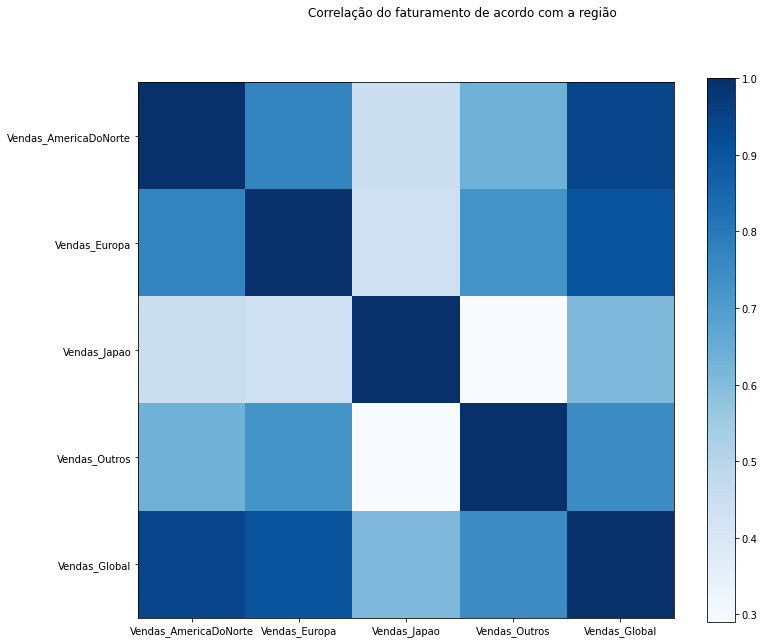

In [7]:
corr=varquantitativas.corr()
plt.figure(figsize=(12,10))
plt.imshow(corr,cmap='Blues',interpolation='none')  
plt.colorbar()  
plt.xticks(range(len(corr)), corr.columns)  
plt.yticks(range(len(corr)), corr.columns)
plt.suptitle("Correlação do faturamento de acordo com a região")
plt.show()  

Nessa matriz quanto mais azul for o quadrado entre duas variáveis,maior será a correlação entre elas . Pode-se observar da matriz que as variáveis Vendas_AmericaDoNorte e Vendas_Europa tem uma correlação muito forte,maior que 0.9, com a variável venda global,o que é um indicio de que se o jogo tiver uma alto faturamento nessas regiões haverá uma alto faturamento global . A variável "Vendas_Outros" possui uma relação forte(maior que 0.7) com a "Vendas_Global",e "Vendas_Japao" há uma relação moderada . 

Agora que conhecemos a relação das vendas globais de acordo com as regiões,irei conhecer os jogos que tiveram o maior faturamento,porém antes de conhecermos quais são esses jogos,para efeito de comparação irei calcular quais jogos diferentes existem com o comando nunique . 

In [8]:
dados["Nome"].nunique()

11493

De acordo com o resultado do comando,há 11493 diferentes jogos no dataset . Para que possamos conhecer quais são os dez que mais faturaram,irei agrupar pelo nome,pois pode ser que um jogo seja vendido em mais de uma plataforma,dessa forma os dez que mais faturaram são :

In [9]:
maisvendidos=dados.groupby("Nome")["Vendas_Global"].sum().sort_values(ascending=False).head(10)
maisvendidos=maisvendidos.to_frame()
maisvendidos.reset_index(level=["Nome"],inplace=True)
maisvendidos

,Nome,Vendas_Global
0,Wii Sports,82.74
1,Grand Theft Auto V,55.92
2,Super Mario Bros.,45.31
3,Tetris,35.84
4,Mario Kart Wii,35.82
5,Wii Sports Resort,33.00
6,Pokemon Red/Pokemon Blue,31.37
7,Call of Duty: Black Ops,31.03
8,Call of Duty: Modern Warfare 3,30.83
9,New Super Mario Bros.,30.01


Ao se analisar os jogos com maior faturamento,pode-se observar que o jogo que mais arrecadou foi Wii Sports,seguido por Grand Theft AutoV(Gta 5) e Super Mario Bros . Outra análise que pode ser feita,é que os jogos da Nintendo(Wii Sports,Super Mario Bros.,Mario Kart Wii,Wii Sports Resort,Pokemon Red/Pokemon Blue,New Super Mario Bros.) aparecem 6 vezes no top10 de maior faturamento . É de se destacar também que a franquia Call Of Duty aparece duas vezes no top10,com os jogos Call of Duty: Black Ops e Call of Duty: Modern Warfare 3	. 
Após conhecermos os dez que mais arrecadaram é possivel analisar os dez que menos faturaram . 

In [10]:
menosvendidos=dados.groupby("Nome")["Vendas_Global"].sum().sort_values().head(10)
menosvendidos=menosvendidos.to_frame()
menosvendidos.reset_index(level=["Nome"],inplace=True)
menosvendidos

,Nome,Vendas_Global
0,H2O+: Footprints in the Sand,0.01
1,Mahjong Taikai IV,0.01
2,Magicians Academy,0.01
3,Builder's Block,0.01
4,Bullet Soul: Tama Tamashii,0.01
5,Sora no Otoshimono: DokiDoki Summer Vacation,0.01
6,Soshite Kono Uchuu ni Kirameku Kimi no Shi XXX,0.01
7,Bunmei Kaika: Aoiza Ibunroku Saien,0.01
8,SoulCalibur Legends (JP sales),0.01
9,SoulLink Extension,0.01


Ao se analisar os 10 que menos arrecadaram,pode-se observar que eles empatam,porém o jogo H2O+: Footprints in the Sand	 aparece em primeiro lugar . Após conhecermos quais foram os focos que mais arrecadaram e menos arrecadaram,é possivel conhecer quais gêneros tiveram,em média,maior faturamento . 

In [11]:
generovenda=dados.groupby("Genero")["Vendas_Global"].mean().sort_values(ascending=True).index
generovalorvenda=dados.groupby("Genero")["Vendas_Global"].mean().sort_values(ascending=True).values

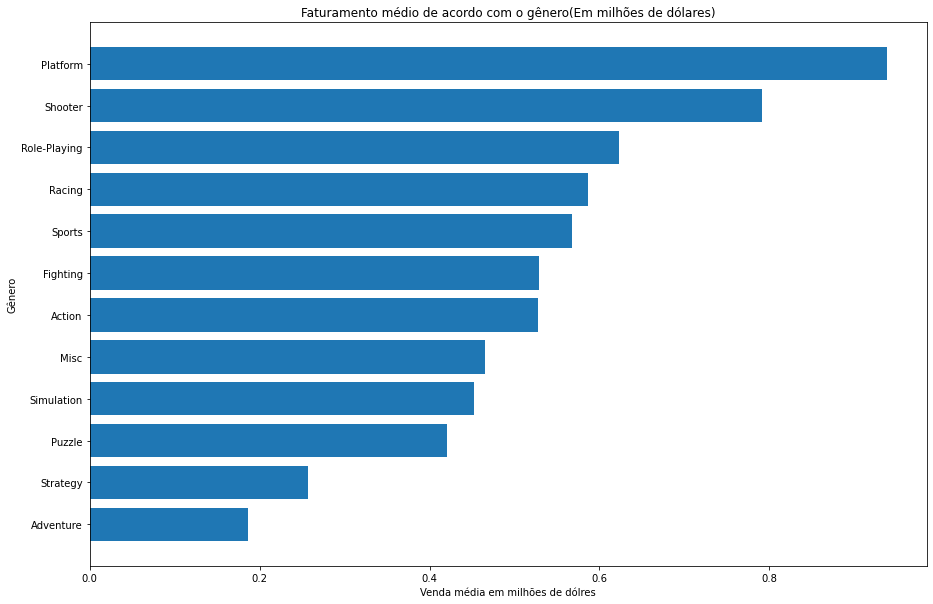

In [12]:
plt.figure(figsize=(15,10))
plt.barh(generovenda,generovalorvenda)
plt.title("Faturamento médio de acordo com o gênero(Em milhões de dólares)")
plt.xlabel("Venda média em milhões de dólares")
plt.ylabel("Gênero")
plt.show()

Ao se observar o gráfico,é possivel verificar que os gêneros que tiveram o maior faturamento médio foram plataforma,shooter(tiroteio),e Rolee-Playing . Enquanto que os gêneros que tiveram o menor faturamento médio foram os jogos de aventura,estratégia,e puzzle(Quebra-Cabeça) .
Pode-se então conhecer quais foram as publicadoras de jogos que mais faturaram,porém assim como fiz com os jogos,irei calcular quantas publicadoras existem no banco de dados com o comando nunique . 

In [13]:
dados["Publicadora"].nunique()

578

Há 578 publicadoras no banco de dados,sendo as 10 que mais faturaram são :

In [14]:
publicadoramaiorfat=dados.groupby("Publicadora")["Vendas_Global"].sum().sort_values(ascending=False).reset_index(level="Publicadora").head(10)
publicadoramaiorfat.columns=["Publicadora","Faturamento total(Em milhões de dólares)"]
publicadoramaiorfat

,Publicadora,Faturamento total(Em milhões de dólares)
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
5,Take-Two Interactive,399.54
6,THQ,340.77
7,Konami Digital Entertainment,283.64
8,Sega,272.99
9,Namco Bandai Games,254.09


Ao se analisar os dados das publicadoras com o maior faturamento,pode-se notar que a Nintendo é a publicadora de jogos com maior faturamento,com o faturamento de 1786 milhões,seguido por Eletronic Arts e Activision . Por fim,podemos conhecer as publicadoras com o menor faturamento . 

In [15]:
publicadormenorfat=dados.groupby("Publicadora")["Vendas_Global"].sum().sort_values().reset_index(level="Publicadora").head(10)
publicadormenorfat.columns=["Publicadora","Faturamento total(Em milhões de dólares)"]
publicadormenorfat

,Publicadora,Faturamento total(Em milhões de dólares)
0,"Interworks Unlimited, Inc.",0.01
1,Inti Creates,0.01
2,Epic Games,0.01
3,Otomate,0.01
4,Takuyo,0.01
5,Ongakukan,0.01
6,UIG Entertainment,0.01
7,Media Entertainment,0.01
8,Piacci,0.01
9,Boost On,0.01


As dez publicadoras que menos faturam possuem um faturamento de 0.01 milhão de doláres,sendo que  lista é composta por Interworks Unlimited, Inc.,Inti Creates,e Epic Games . Por fim,é possivel analisar quais foram as plataformas que mais faturam .

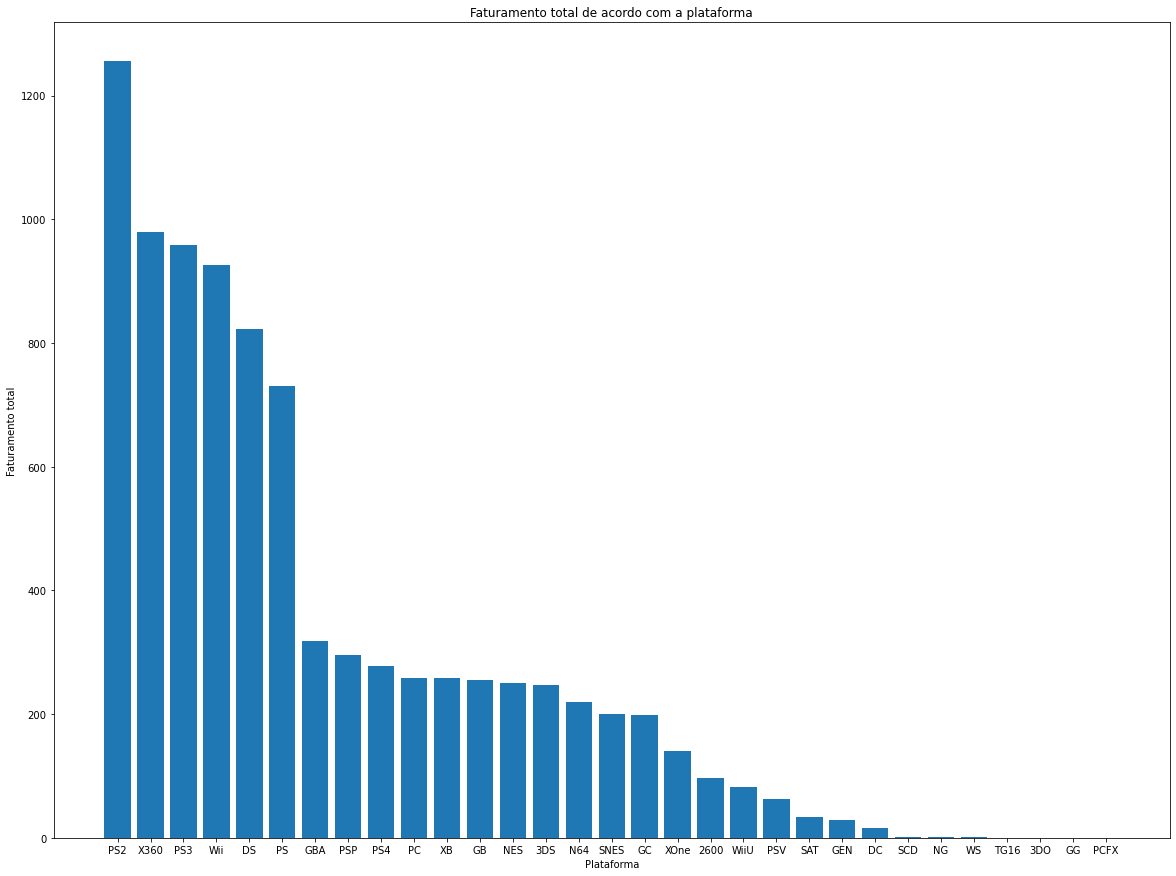

In [16]:
plataformavalores=dados.groupby("Plataforma")["Vendas_Global"].sum().sort_values(ascending=False).values
plataformaindex=dados.groupby("Plataforma")["Vendas_Global"].sum().sort_values(ascending=False).index
plt.figure(figsize=(20,15))
plt.bar(plataformaindex,plataformavalores)
plt.title("Faturamento total de acordo com a plataforma")
plt.xlabel("Plataforma")
plt.ylabel("Faturamento total")
plt.show()

Ao analisar o gráfico "Faturamento total de acordo com a plataforma",é possível observar que as plataformas que tiveram o maior faturamento em vendas de jogos foram PS2(Playstation2),X360(Xbox 360),e PS3(Playstation 3 ) . Enquanto que PCFX,GG,TG16 foram as que tiveram um faturamento menor . É possivel analisar como se deu o faturamento total de vendas de jogos de acordo com o ano que o jogo foi lançado . 

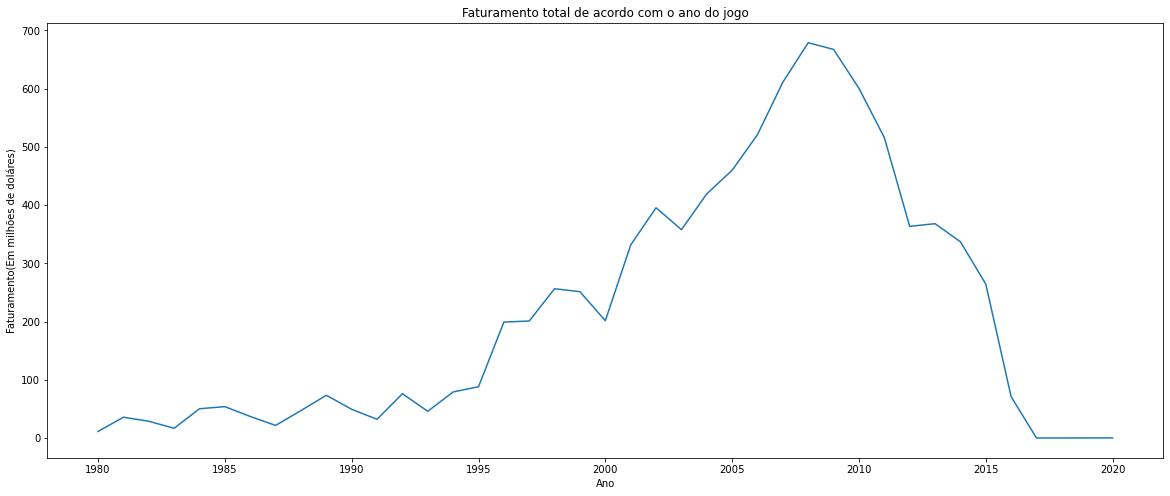

In [17]:
ano=dados.groupby("Ano")["Vendas_Global"].sum().index
faturamento=dados.groupby("Ano")["Vendas_Global"].sum().values
plt.figure(figsize=(20,8))
plt.plot(ano,faturamento)
plt.title("Faturamento total de acordo com o ano do jogo")
plt.xlabel("Ano")
plt.ylabel("Faturamento(Em milhões de doláres)")
plt.show()

Ao analisar o gráfico,é possível verificar que houve algumas oscilações no faturamento de acordo com o ano de lançamento do jogo,mas houve um tendência de alta entre a década de 80 até 2009 . Porém ,os jogos lançados nos últimos 5 anos vem tendo uma queda expressiva no faturamento .  

#Conclusão :

Logo,nesse projeto tentei entender um pouco sobre o mercado de jogos digitais,conhecendo os jogos,gêneros,publicadoras,e publicadora que mais e menos faturam . Pode-se observar que o jogo que mais faturou foi Wii Sports,o gênero que mais faturou foi plataforma,a publicadora que mais faturou foi a Nintendo,e também que os jogos do PS2 tiveram um maior faturamento . Enquanto que H2O+: Footprints foi o jogo que menos faturou,a plataforma que menos faturou foi PCFX . Além disso,as regiões da América do Norte e Europa tem uma relação muito alta com o faturamento dos jogos mundialmente,isto é,se um jogo tem um alto faturamento nessas regiões,haverá um alto faturamento global . É de salientar também que o mercado de vendas de jogos digitais tiveram uma tendência de sucesso entre os anos de 1980 a 2009 ,porém os jogos lançados nos últimos aparentam possuir uma queda no faturamento . 